In this tutorial, we will be using California housing data from Kaggle (here). We will use location data (latitude and longitude) as well as the median house value. We will cluster the houses by location and observe how house prices fluctuate across California.
-longitude: A value representing how far west a house is. Higher values represent houses that are further West.
-latitude: A value representing how far north a house is. Higher values represent houses that are further north.
-median_house_value: The median house price within a block measured in USD. 

REf:https://www.datacamp.com/tutorial/k-means-clustering-python

In [40]:
import pandas as pd

home_data = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


Visualize the data
This code imports the Seaborn library and uses the scatterplot() function to create a scatter plot.
• The data parameter specifies the dataset to be used, which is home_data.
• The x and y parameters specify the variables to be plotted on the x and y axes, respectively, which are longitude and latitude.
• The hue parameter specifies the variable to be used for color coding the points, which is median_house_value.
• This code will create a scatter plot of the longitude and latitude of the homes in the dataset, with the color of each point representing the median house value.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

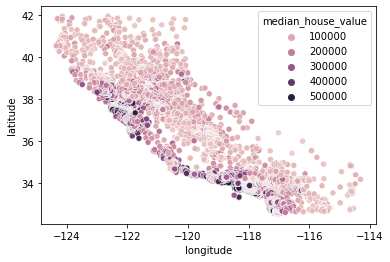

In [2]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

We see that most of the expensive houses are on the west coast of California with different areas that have clusters of moderately priced houses. This is expected as typically waterfront properties are worth more than houses that are not on the coast. 

When working with distance-based algorithms, like k-Means Clustering, we must normalize the data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

In [4]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

This code imports the KMeans algorithm from the scikit-learn library and creates an instance of it with three clusters, a random state of 0, and automatic initialization.
• The fit method is then called on the normalized training data X_train_norm to train the KMeans model on the data.
• The KMeans algorithm is a clustering algorithm that groups similar data points together based on their distance from each other.
• The n_clusters parameter specifies the number of clusters to create, while the random_state parameter ensures that the results are reproducible.
• The n_init parameter specifies the number of times the KMeans algorithm will be run with different initializations to find the best clustering solution.

In [9]:
#from sklearn import KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)  # or n_init=20
kmeans.fit(X_train_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

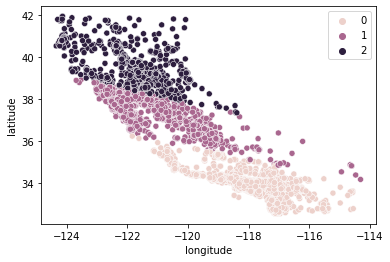

In [10]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

We see that the data are now clearly split into 3 distinct groups (Northern California, Central California, and Southern California). We can also look at the distribution of median house prices in these 3 groups using a boxplot. 

<AxesSubplot:ylabel='median_house_value'>

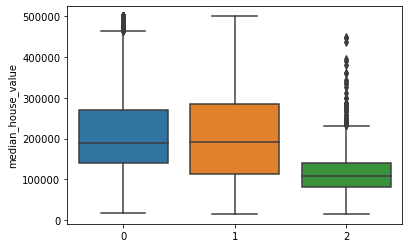

In [11]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

This code imports the silhouette_score function from the sklearn.metrics module.
• The silhouette_score function is used to evaluate the quality of clustering by computing the mean silhouette coefficient of all samples.
• The function takes three arguments: X_train_norm: the normalized training data used for clustering kmeans.labels_: the labels assigned to each data point by the k-means clustering algorithm metric='euclidean': the distance metric used to compute the silhouette score.
• In this case, the Euclidean distance metric is used.
• The function returns the mean silhouette coefficient of all samples, which is a measure of how well each data point fits into its assigned cluster.
• A higher silhouette score indicates better clustering.

In [12]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7499956340585485

# Choosing the best number of clusters
The weakness of k-means clustering is that we don’t know how many clusters we need by just running the model. We need to test ranges of values and make a decision on the best value of k. We typically make a decision using the Elbow method to determine the optimal number of clusters where we are both not overfitting the data with too many clusters, and also not underfitting with too few. 


• First, a range of values for the number of clusters (K) is defined as 2 to 7.
• Then, an empty list called "fits" is created to store the models generated by the KMeans algorithm for each value of K.
• Another empty list called "score" is created to store the silhouette scores for each model.
• Next, a for loop is used to iterate through each value of K.
• Inside the loop, the KMeans algorithm is trained on the normalized training data using the current value of K.
• The resulting model is then appended to the "fits" list.
• The silhouette score is then calculated for the model using the normalized training data and the "euclidean" metric.
• The silhouette score measures how well each data point fits into its assigned cluster, with higher scores indicating better clustering.
• The resulting score is then appended to the "score" list.
• After the loop has finished iterating through all values of K, the "fits" and "score" lists contain the models and corresponding silhouette scores for each value of K.
• These can be used to evaluate the performance of the KMeans algorithm and choose the optimal number of clusters for the data.

In [25]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init=10).fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

In [36]:
fits

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=0, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=0, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=0, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=0, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=0, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy

In [37]:
fits[0]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

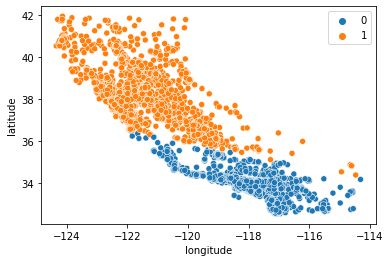

In [26]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

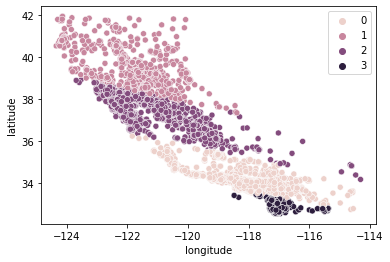

In [27]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

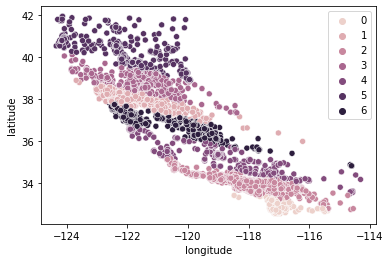

In [39]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[5].labels_)

<AxesSubplot:>

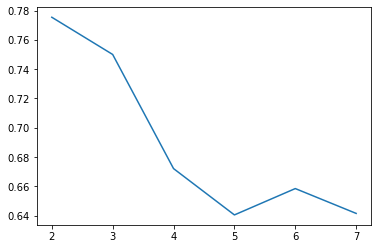

In [29]:
sns.lineplot(x = K, y = score)

We typically choose the point where the improvements in performance start to flatten or get worse. We see k = 5 is probably the best we can do without overfitting. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

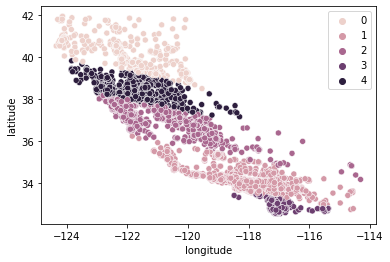

In [30]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)

<AxesSubplot:ylabel='median_house_value'>

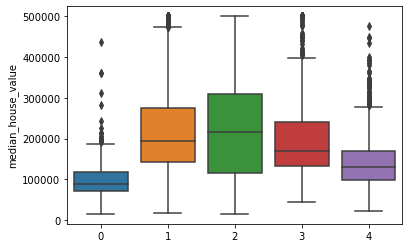

In [31]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])

In [42]:
# Append the silhouette score to scores
score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

In [44]:
print (score)

[0.7754128527515257, 0.7499956340585485, 0.6720696983328215, 0.6404324176961786, 0.6584261636676846, 0.6414625104141526, 0.6414625104141526]


A silhouette score closer to 1 suggests better-defined clusters.
A silhouette score closer to 0 suggests overlapping clusters.
A silhouette score closer to -1 suggests incorrect clustering.

The silhouette score, is a measure of how similar an object is to its own cluster compared to other clusters.
It does not directly indicate the optimal number of clusters, but it can be used to assess the quality of clustering for a given number of clusters.

When using the silhouette score to evaluate clustering results, higher values generally indicate better-defined clusters.